# Ping pong result simulator
#### By: Magnus Kvåle Helliesen
It seems that the result *(9,6)* or *(6,9)* pops up in ping pong unreasonably often. This notebook simulates ping pong matches to see how often it should in fact pop up.

In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt

We make a funciton that returns the result from a single exchange between player 0 and player 1, where $P(\textrm{player 0 wins})=p_0$. The simulation is performed using a uniformily distributet variable $x\sim U(0,1)$, and player 0 wins if $x\leq p_0$. The function returns a pair of values: *person 0 won*, *person 1 won* (boolean values).

In [3]:
def result_from_single_exchange(p0):
    random_uniform = random.uniform(0,1)
    return (random_uniform <= p0), (random_uniform > p0)

Next, we make a function that simulates a whole game, that is a sequence of exchanges until the criteriea for having won the game are met. The function returns a list of all the scores of the game, that is a list of tuples of *(points player 0, points player 1)*.

In [4]:
def result_from_game(p0):
    scores_in_game = [(0, 0)]
    while (max(scores_in_game[-1][0], scores_in_game[-1][1]) < 11) or (abs(scores_in_game[-1][0]-scores_in_game[-1][1]) < 2):
        player0_wins, player1_wins = result_from_single_exchange(p0)
        scores_in_game.append((scores_in_game[-1][0]+player0_wins, scores_in_game[-1][1]+player1_wins))
    return scores_in_game

Lets look at an example game between two equally good players, i.e. $p_0 = 1/2$.

In [5]:
# An example game between equally good players
example_game = result_from_game(0.5)

In [6]:
# All scores of the game
example_game

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 6),
 (2, 6),
 (2, 7),
 (2, 8),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11)]

In [7]:
# The game ended with the score
example_game[-1]

(3, 11)

We now simulate 100,000 games and store it to a list

In [15]:
def game_simulator(n, seed):
    random.seed(seed)
    simulation_of_games = []
    for i in range(n):
        simulation_of_games.extend(result_from_game(0.5))
    return simulation_of_games

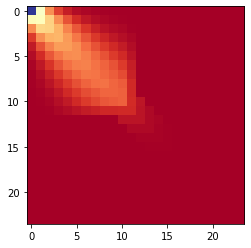

In [16]:
simulation_of_games = game_simulator(10000, 1234)

df = pd.DataFrame(simulation_of_games, columns=['player0_wins', 'player1_wins'])

df_to_plot = (
    pd.DataFrame(simulation_of_games, columns=['player0_wins', 'player1_wins'])
    .assign(**{'': 1})
    .groupby(['player0_wins', 'player1_wins'])
    .count()
    .reset_index()
    .pivot_table(index=['player0_wins'], columns=['player1_wins'], fill_value=0)
)

plt.imshow(df_to_plot, cmap ="RdYlBu")
plt.show()

In [10]:
df = df.assign(**{'new_match': lambda df: [1 if (p1, p2) == (0, 0) else 0 for p1, p2 in zip(df['player0_wins'], df['player1_wins'])]})
df = df.assign(**{'match_id': lambda df: df['new_match'].cumsum()})
df = df.assign(**{'96/69': lambda df: [1 if (p1, p2) in ((9, 6), (6, 9)) else 0 for p1, p2 in zip(df['player0_wins'], df['player1_wins'])]})
df.groupby(df['match_id'])['96/69'].sum().mean()

0.30466

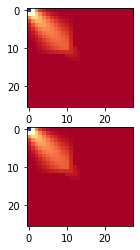

In [14]:
fig, ax = plt.subplots(2)
ax[0].imshow(df_to_plot, cmap ="RdYlBu")
ax[1].imshow(df_to_plot, cmap ="RdYlBu")